In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
data = pd.read_csv("./iris/iris.data")
feature_column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.columns = [*feature_column, "class"]
sample =data.sample(5)
sample

,sepal_length,sepal_width,petal_length,petal_width,class
14,5.7,4.4,1.5,0.4,Iris-setosa
12,4.3,3.0,1.1,0.1,Iris-setosa
57,6.6,2.9,4.6,1.3,Iris-versicolor
47,5.3,3.7,1.5,0.2,Iris-setosa
91,5.8,2.6,4.0,1.2,Iris-versicolor


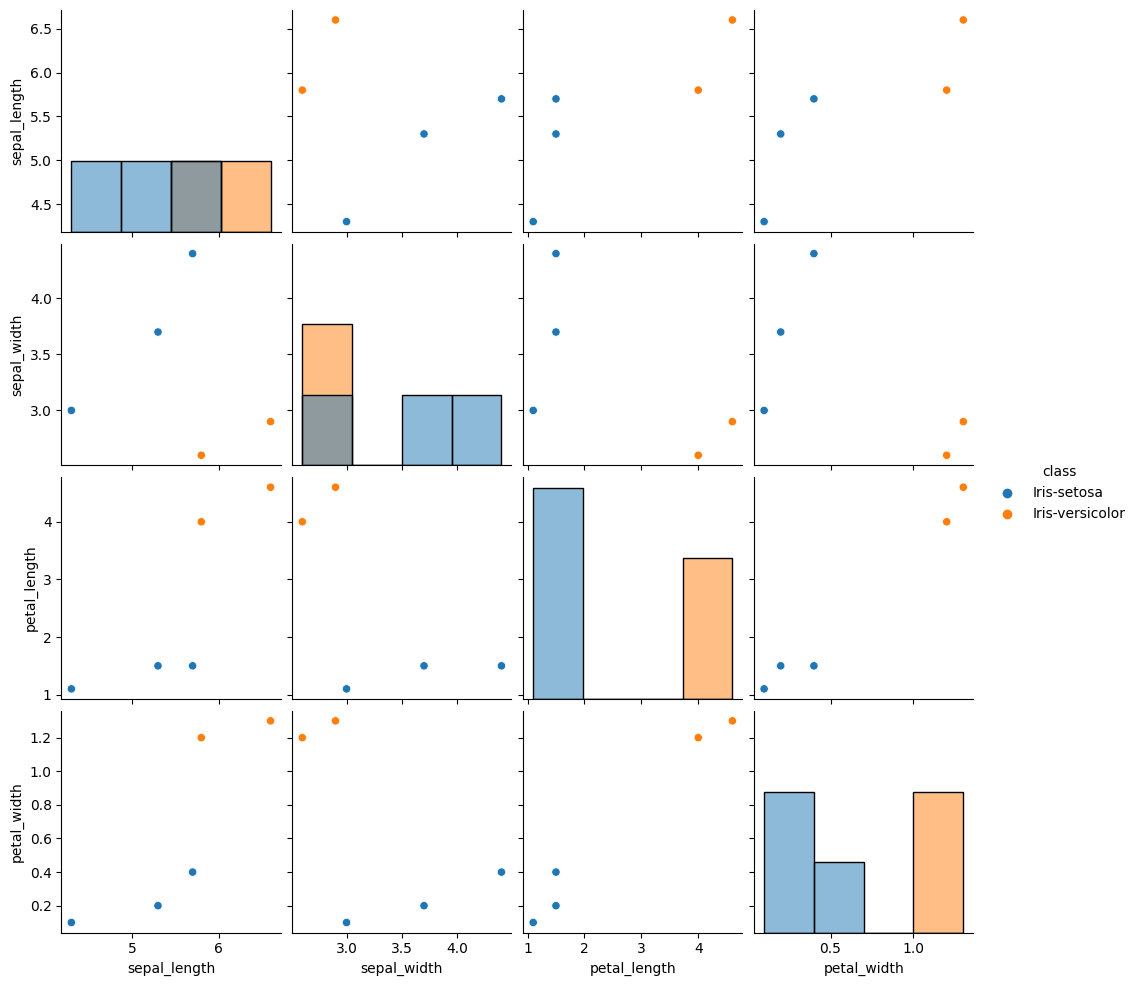

In [26]:
# plot the data 
sns.pairplot(sample, hue="class", diag_kind="hist")
plt.show()

In [27]:
feature_data = data[feature_column]
feature_data

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [28]:
class PCA:
  def __init__(self, data: pd.DataFrame, classes = pd.Series) -> None:
    self.__data = data
    self.__classes = classes  
    self.__eigval: np.ndarray = None
    self.__eigvec: np.ndarray = None
    self.__x_adj: pd.DataFrame = None
    self.__cov_adj: pd.DataFrame = None
    self.__sort_idx: np.ndarray = None
    self.__cal_pca()

  def __cal_pca(self):
    self.__x_adj = (self.__data - self.__data.mean()) 
    self.__cov_adj = self.__x_adj.cov()
    self.__eigval, self.__eigvec = np.linalg.eig(self.__cov_adj)
    self.__sort_idx = np.argsort(self.__eigval)[::-1]
    self.__eigvec = self.__eigvec.T

  def eigvec(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigvec
    
    return self.__eigvec[self.__sort_idx[:n]]
  
  def eigval(self, n: int = None) -> np.ndarray:
    if n == None:
      return self.__eigval

    return self.__eigval[self.__sort_idx[:n]]
  
  def project(self, n: int) -> pd.DataFrame:
    max_eigvec = self.eigvec(n)
    new_x = max_eigvec.dot(self.__x_adj.T).T
    new_x = pd.DataFrame(new_x)
    new_x.columns = [f"PC{i+1}" for i in range(n)]
    new_x["class"] = self.__classes
    return new_x
  
  def per_var_of(self, n: int) -> float:
    return self.eigval(n).sum() / self.eigval().sum()
  
  def eig_var(self) -> list[float]:
    sum_val = self.__eigval.sum()
    return [ e / sum_val for e in self.__eigval]

In [29]:
def plot_pca(data: pd.DataFrame, axises: list[str], labels=list, pointsize: int = 0.7, viewbox: list = None) -> None:
  p = None
  if len(axises) == 3:
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    if viewbox:
      ax.view_init(elev=viewbox[0], azim=viewbox[1], roll=viewbox[2])
    for l in labels:
      sc = data[data["class"] == l]
      ax.scatter3D(*[sc[axis] for axis in axises], s=pointsize,)
      ax.set_xlabel(axises[0])
      ax.set_ylabel(axises[1])
      ax.set_zlabel(axises[2])
  else:
    for l in labels:
      sc = data[data["class"] == l]
      plt.scatter(*[sc[axis] for axis in axises], s=pointsize,)
    plt.xlabel(axises[0])
    plt.ylabel(axises[1])
  plt.legend(labels)
  plt.show()

In [30]:
def add_class(data: pd.DataFrame, classes: pd.Series) -> pd.DataFrame:
  with_class = data.copy()
  with_class["class"] = classes
  return with_class

In [31]:
pca = PCA(feature_data, data["class"])

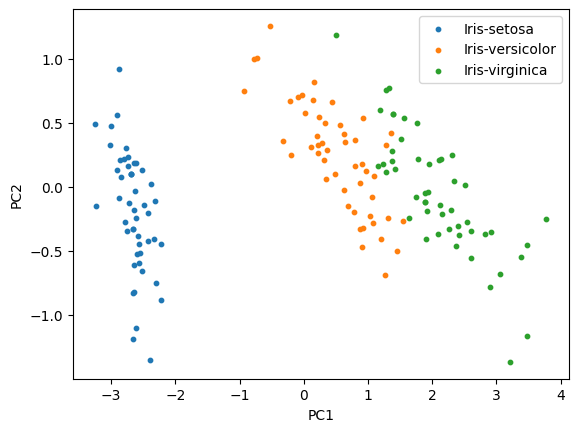

In [32]:
plot_pca(pca.project(2), ["PC1","PC2"], data["class"].unique(), pointsize=10)

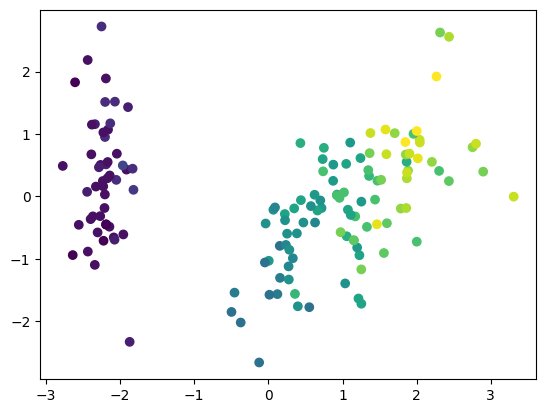

In [33]:
iris = pd.read_csv("./iris/iris.data", header=None)
iris_class = iris[3]
iris = iris.drop(4, axis=1)
iris_std = StandardScaler().fit_transform(iris)

pca = PCA(n_components=2, svd_solver='full')
pca.fit(iris_std)
iris_pca = pca.transform(iris_std)

plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris_class)
plt.show()

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


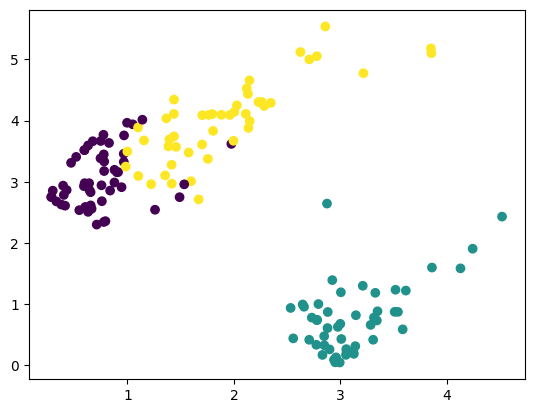

In [37]:
iris = pd.read_csv("./iris/iris.data", header=None)
iris = iris.drop(4, axis=1)
iris_std = StandardScaler().fit_transform(iris)

pca = PCA(n_components=2, svd_solver='full')
pca.fit(iris_std)
iris_pca = pca.transform(iris_std)

kmeans_pca = KMeans(n_clusters=3, algorithm='elkan')
iris_kmeans_pca = kmeans_pca.fit_transform(iris_pca)

plt.scatter(iris_kmeans_pca[:,0], iris_kmeans_pca[:,1], c=kmeans_pca.labels_)
plt.show()